In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import math
import seaborn as sns
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [8]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
df1 = pd.read_csv('train_and_test2.csv')

In [12]:
df1.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [14]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [16]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [18]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [20]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# train_and_test2.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('train_and_test2.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'train_and_test2.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 28 columns


In [22]:
print(df1.shape)  # This will show the number of rows and columns in df1

(1000, 28)


In [24]:
df1.head(5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [26]:
df1.tail()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
995,996,16.0,8.5167,1,1,0,0,0,0,0,...,0,0,0,3,0,0,0.0,0,0,0
996,997,28.0,22.5250,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
997,998,21.0,7.8208,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
998,999,28.0,7.7500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
999,1000,28.0,8.7125,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [28]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nCol = df.shape[1]
    nGraphRow = int(math.ceil(nGraphShown / nGraphPerRow))  # Ensure it's an integer
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        colors = plt.cm.Set2(np.linspace(0, 1, len(columnDf.value_counts())))
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            columnDf.value_counts().plot.bar(color=colors)  # Colorful bar plot
        else:
            columnDf.hist(color='limegreen')  # Colorful histogram
        plt.ylabel('counts')
        plt.title(f'{df.columns[i]} distribution')
    data = columnDf.value_counts()

    plt.tight_layout()
    plt.show()


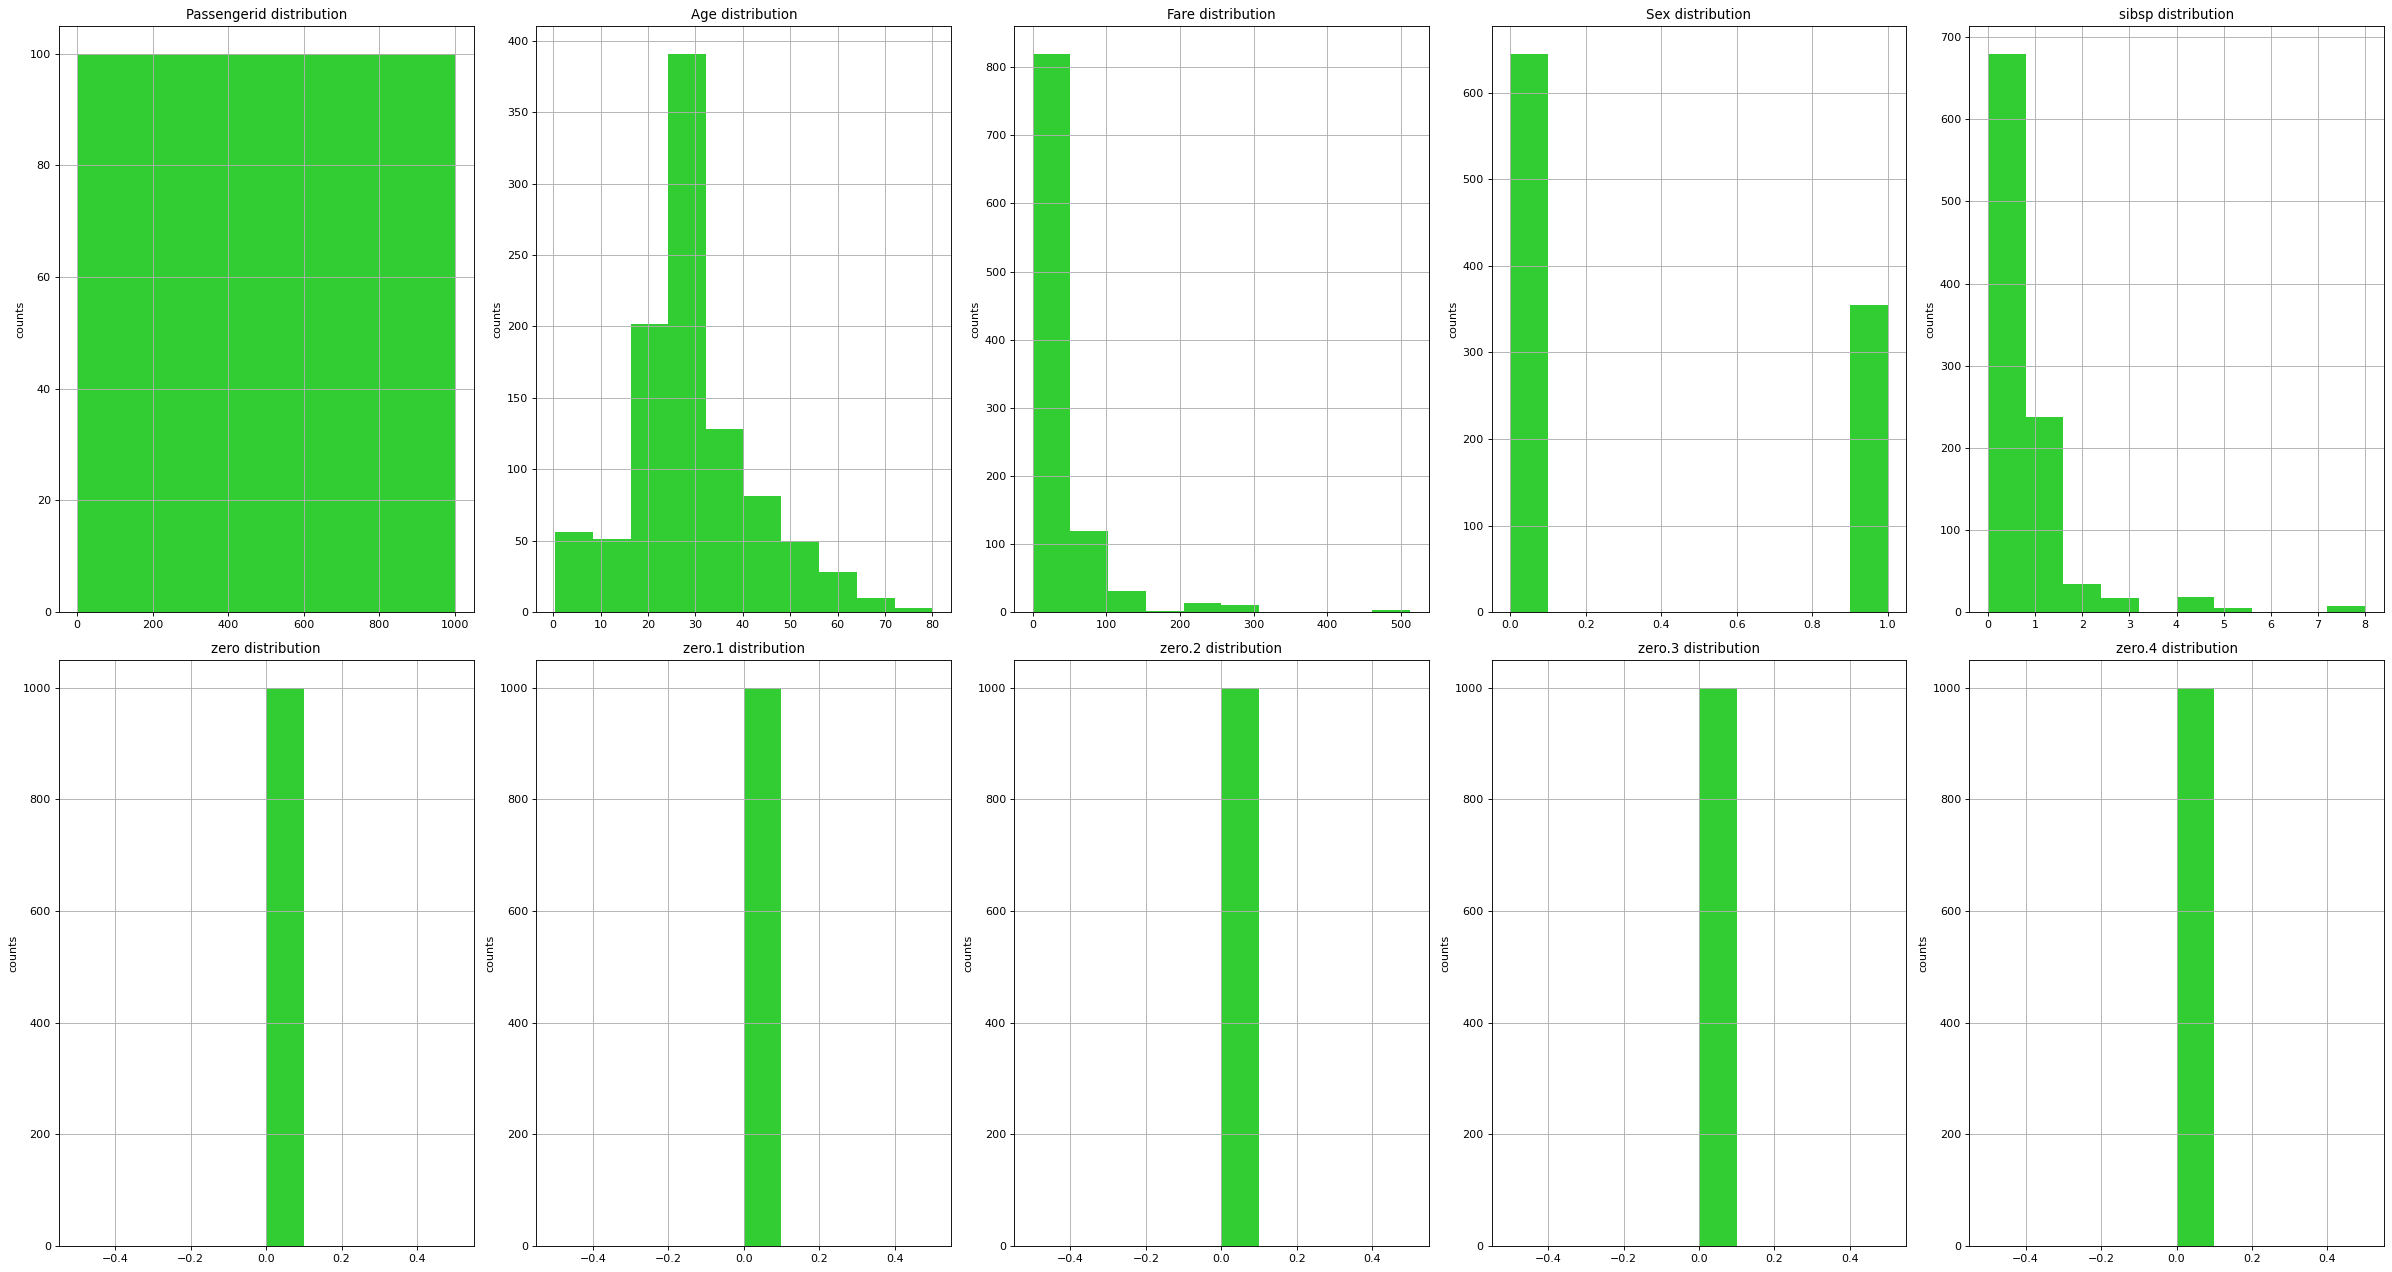

In [30]:
plotPerColumnDistribution(df1, 10, 5)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, graphWidth):
    #Drops columns with NaN values and columns with only one unique value, 
    #then plots the correlation matrix of the remaining columns
    
    df = df.dropna(axis=1)
    
    # Keep columns where there are more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    # Check if there are enough columns to plot
    if df.shape[1] < 2:
        print("Not enough columns with more than 1 unique value to plot correlation matrix.")
        return
    
    # Compute correlation matrix
    corr = df.corr()
    
    # Plot the correlation matrix
    plt.figure(figsize=(graphWidth, graphWidth))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()


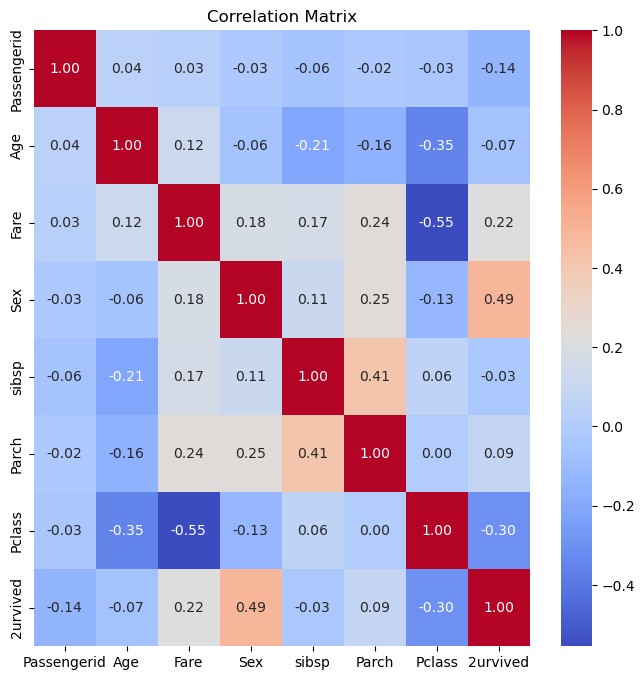

In [34]:
plotCorrelationMatrix(df1, 8)

In [36]:
def plotScatterMatrix(df, plotSize, textSize):
    """
    Plots a scatter matrix of numerical columns in the dataframe.
    Drops columns with NaN values and columns with only one unique value.
    """
    df = df.select_dtypes(include=[np.number])  # Keep only numerical columns
    df = df.dropna(axis=1)  # Drop columns with NaN values
    df = df[[col for col in df if df[col].nunique() > 1]]  # Keep columns with more than 1 unique value
    
    if df.shape[1] < 2:  # Check if enough columns are available
        print("Not enough numerical columns to plot scatter matrix.")
        return
    
    plt.figure(figsize=(plotSize, plotSize))
    
    # Plot scatter matrix
    sns.pairplot(df)
    plt.suptitle('Scatter Matrix', size=textSize)
    plt.show()

<Figure size 2000x2000 with 0 Axes>

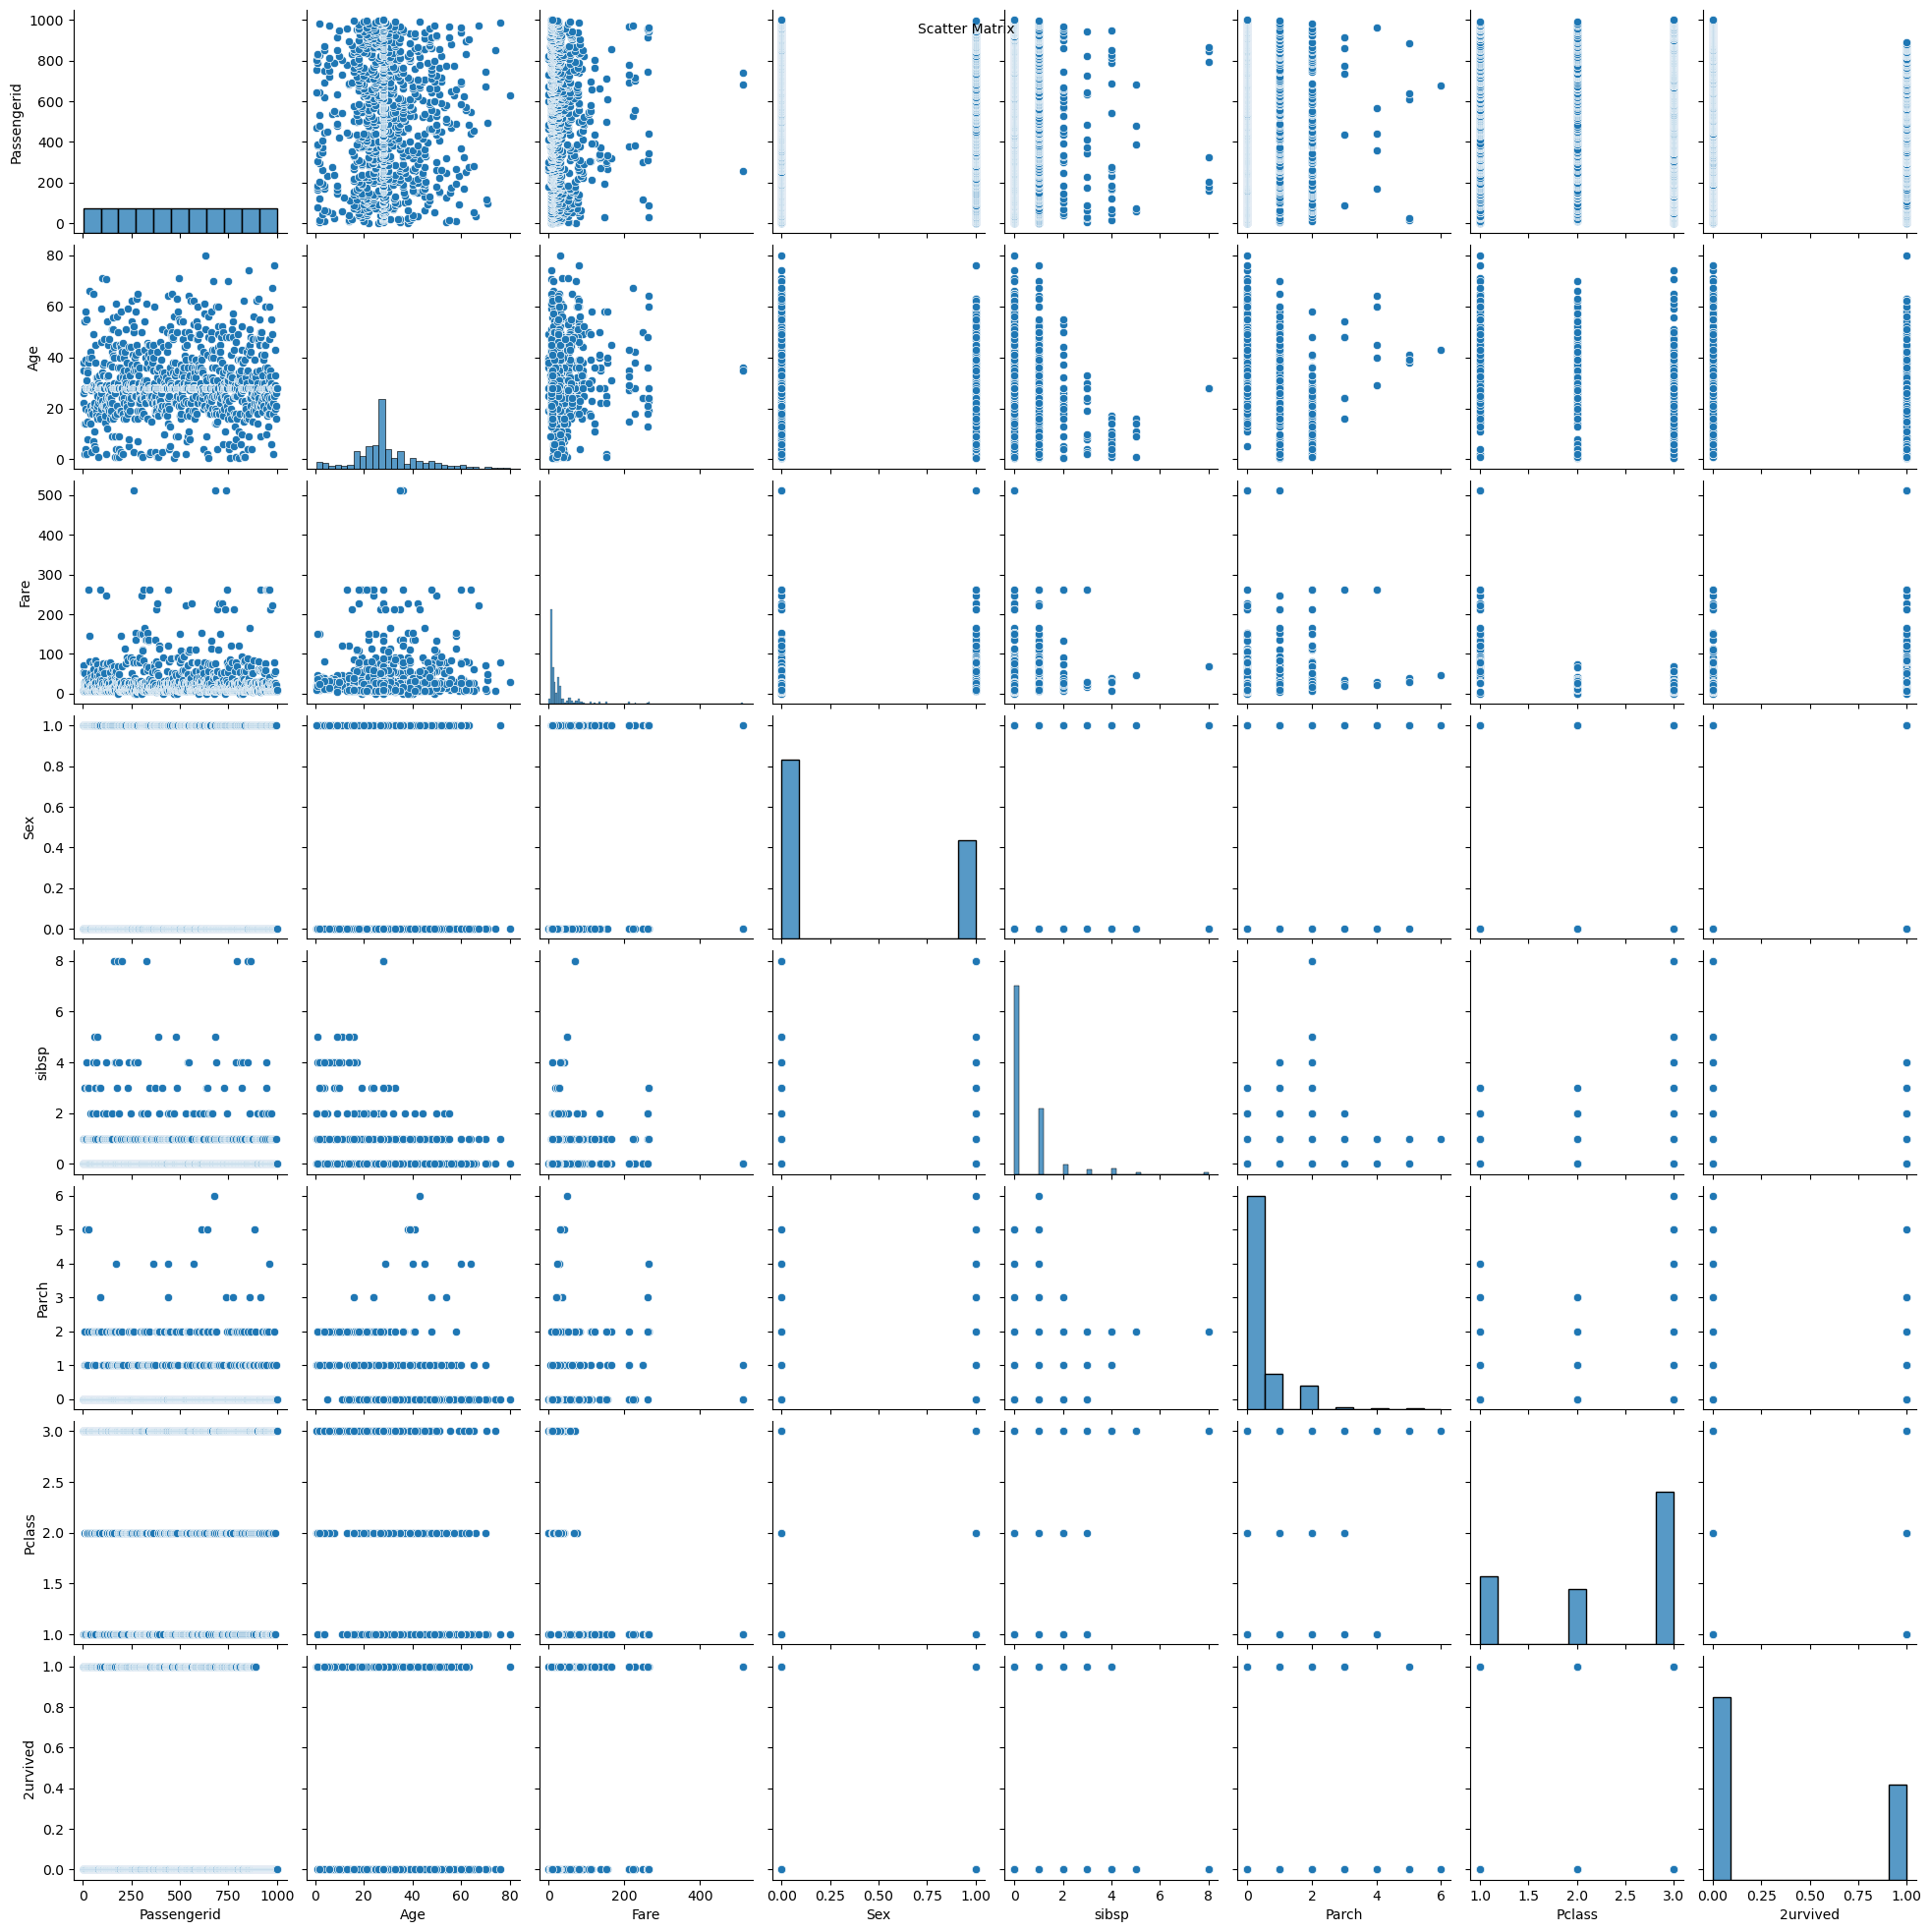

In [38]:
plotScatterMatrix(df1, 20, 10)

In [40]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

In [42]:
def plot_value_counts(df, col_name, firstchar = False):
    # Count occurrences of special values/strings
    if firstchar:
        value_counts = df[col_name].fillna('nan').str[0].value_counts()
    else:
        value_counts = df[col_name].fillna('nan').value_counts()

    # Plot the results
    value_counts.plot(kind='bar', color='skyblue')
    plt.title('Count of Special Values/Strings')
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.show()
    
    return value_counts

In [44]:
def encode(df, col_name, dropna = True):
    if dropna:
        unique_values = df[col_name].dropna().unique()
    else:
        unique_values = df[col_name].unique()
    encoding = {value: index for index, value in enumerate(unique_values)}
    df[col_name] = df[col_name].map(encoding)
    return df

#Example- If a column contains ["apple", "banana", "orange"], 
#    it will convert them into { "apple": 0, "banana": 1, "orange": 2 }.

In [46]:
def plot_correlation(df, hue, title, xlabel, ylabel, palette='Set2'):
    sns.countplot(data=df, x=xlabel, hue=hue, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [48]:
def plot_violin(df, hue, title, xlabel, ylabel, palette='Set2'):
    sns.violinplot(data=df, x=xlabel, y=ylabel, hue=hue, palette=palette, split=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [50]:
labels = df_train['Survived'].to_numpy()
dfr = df_train.drop(['PassengerId'], axis=1)

# Exploratory data analysis

In [53]:
dfr

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
nans = dfr.isna().sum().sort_values(ascending=False) # Means Desc Order
pct = 100 * nans / dfr.shape[0]
nan_stats = pd.concat([nans, pct], axis=1)
nan_stats.columns = ['num_of_missing_values', 'percentage_of_missing_values']
print("Missing values of training set:")
nan_stats

Missing values of training set:


,num_of_missing_values,percentage_of_missing_values
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [57]:
# We can see cabin have a lot of those missing values so we will ignore it

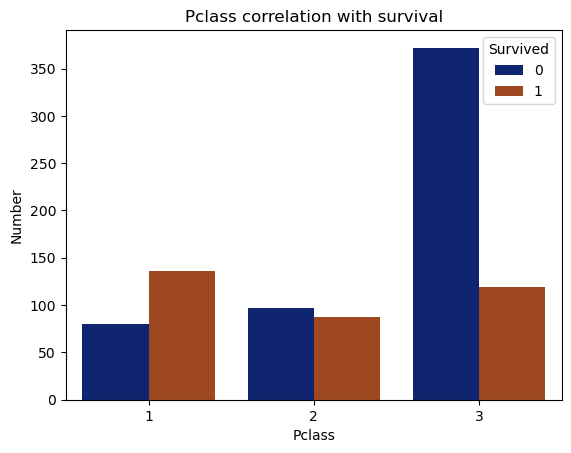

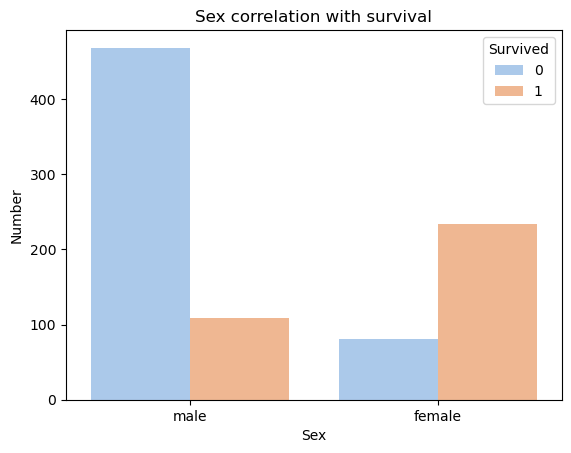

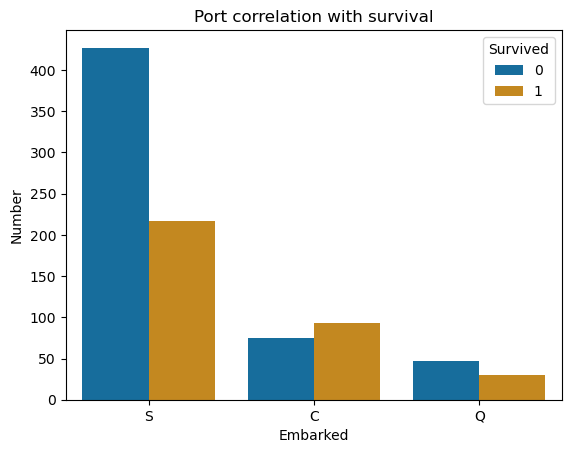

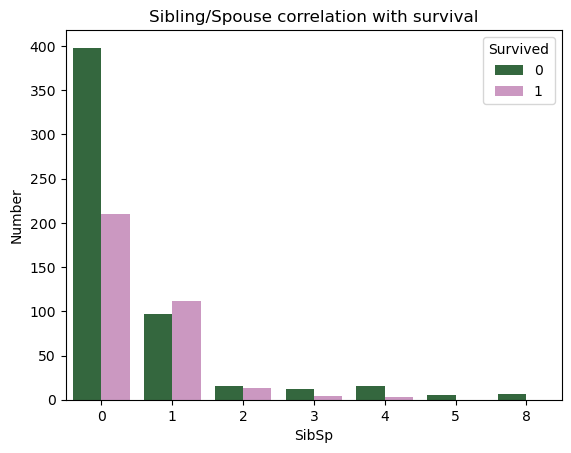

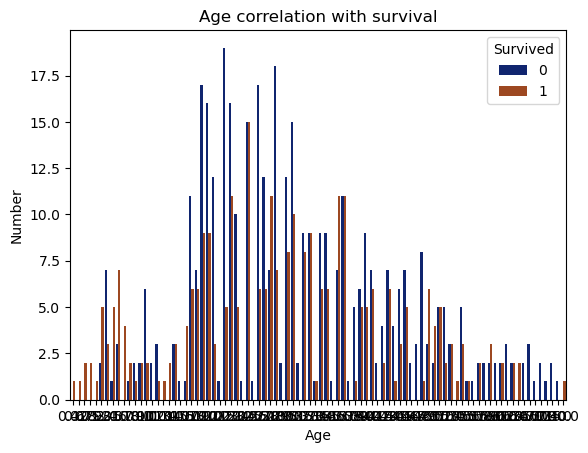

In [59]:
plot_correlation(dfr, 'Survived', 'Pclass correlation with survival', 'Pclass', 'Number', palette='dark')

plot_correlation(dfr, 'Survived', 'Sex correlation with survival', 'Sex', 'Number', palette='pastel')

plot_correlation(dfr, 'Survived', 'Port correlation with survival', 'Embarked', 'Number', palette='colorblind') # For colorblind peoples
# C: Cherbourg, Q: Queenstown, S: Southampton .....These are the names of the ports where passengers embarked onto the ship.

plot_correlation(dfr, 'Survived', 'Sibling/Spouse correlation with survival', 'SibSp', 'Number', palette='cubehelix')
# This column indicates the number of siblings or spouses a passenger had aboard the Titanic.

plot_correlation(dfr, 'Survived', 'Age correlation with survival', 'Age', 'Number', palette='dark')
# there are a lot of ages, the younger people seem to survive less. We will present it differently, using a violin plot instead of a histogram.

In [61]:
# As we can see Pclass is an important feature. Sex is too. We will group them and see to importance of them combined

dfr[['Pclass', 'Sex', 'Survived']].groupby(['Pclass','Sex']).mean() * 100

# they are far better predictors togther, we will add them and their grouped to the main data for training

Survived
Pclass Sex              
1      female  96.808511
       male    36.885246
2      female  92.105263
       male    15.740741
3      female  50.000000
       male    13.544669

In [63]:
df = pd.concat([dfr[['Pclass', 'Sex']], dfr['Pclass'].astype(str) + dfr['Sex']], axis=1)
tst = pd.concat([df_test[['Pclass', 'Sex']], df_test['Pclass'].astype(str) + df_test['Sex']], axis=1)

In [65]:
df.rename(columns = {0 : 'PclassSex'}, inplace=True)
tst.rename(columns = {0 : 'PclassSex'}, inplace=True)

In [67]:
df = pd.concat([df, dfr['Survived']], axis=1)

In [69]:
# Continuing For AGE

df['Age'] = dfr['Age']
tst['Age'] = df_test['Age']

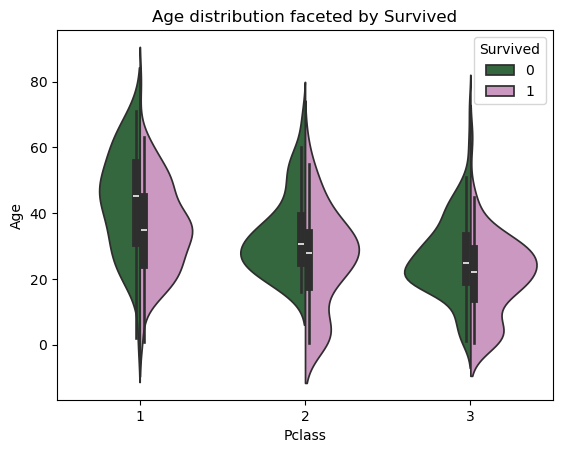

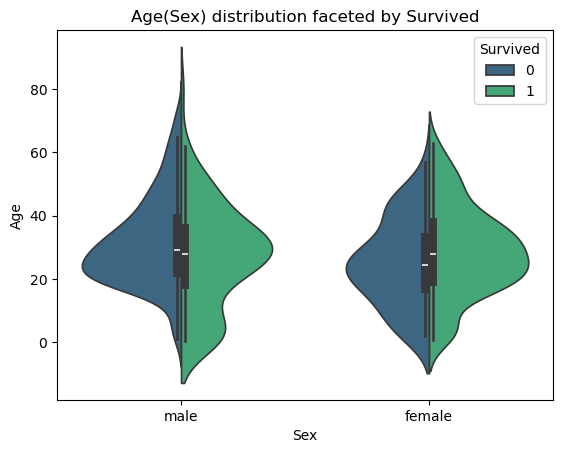

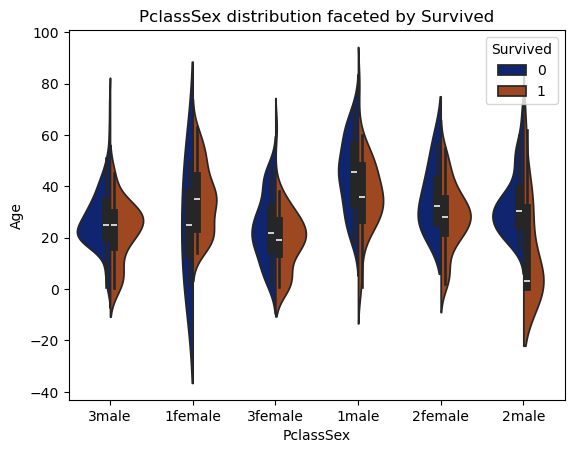

In [71]:
plot_violin(df, 'Survived', 'Age distribution faceted by Survived', 'Pclass', 'Age', palette='cubehelix')

plot_violin(df, 'Survived', 'Age(Sex) distribution faceted by Survived', 'Sex', 'Age', palette='viridis')

plot_violin(df, 'Survived', 'PclassSex distribution faceted by Survived', 'PclassSex', 'Age', palette='dark')


In [73]:
# Lets check sibsp and parch togther because they are both indicators of type of family

In [75]:
df[['Parch', 'SibSp', 'Embarked']] = dfr[['Parch', 'SibSp', 'Embarked']]
tst[['Parch', 'SibSp', 'Embarked']] = df_test[['Parch', 'SibSp', 'Embarked']]

dfr[['Parch', 'SibSp', 'Survived']].groupby(['Parch', 'SibSp']).agg(mean_survived=('Survived', 'mean'), count=('Survived', 'size'))

mean_survived  count
Parch SibSp                      
0     0           0.303538    537
      1           0.520325    123
      2           0.250000     16
      3           1.000000      2
1     0           0.657895     38
      1           0.596491     57
      2           0.857143      7
      3           0.000000      7
      4           0.000000      9
2     0           0.724138     29
      1           0.631579     19
      2           0.500000      4
      3           0.285714      7
      4           0.333333      9
      5           0.000000      5
      8           0.000000      7
3     0           1.000000      1
      1           0.333333      3
      2           1.000000      1
4     0           0.000000      1
      1           0.000000      3
5     0           0.000000      2
      1           0.333333      3
6     1           0.000000      1

In [77]:
# WE CAN SEE A SLIGHT CONNECTION HERE SO ADDING THEM

df['SibSpParch'] = dfr['SibSp'].astype(str) + dfr['Parch'].astype(str)
tst['SibSpParch'] = df_test['SibSp'].astype(str) + df_test['Parch'].astype(str)

In [79]:
# The most intuitive thing to check about the name is credentials, we will check it's length and number of unique letters

df['Credentials'] = dfr['Name'].str.split().str[1]
tst['Credentials'] = df_test['Name'].str.split().str[1]

np.sort(df['Credentials'].unique())

array(['Billiard,', 'Capt.', 'Carlo,', 'Col.', 'Cruyssen,', 'Don.', 'Dr.',
       'Gordon,', 'Impe,', 'Jonkheer.', 'Major.', 'Master.', 'Melkebeke,',
       'Messemaeker,', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.',
       'Mulder,', 'Pelsmaeker,', 'Planke,', 'Rev.', 'Shawah,', 'Steen,',
       'Velde,', 'Walle,', 'der', 'the', 'y'], dtype=object)

In [81]:
# Now We will handle almost not occuring values by assigning them to the expected value using sex

value_counts = df['Credentials'].value_counts()
values_to_replace = value_counts[value_counts < 5].index
def replace_pronouns(row):
    if row['Credentials'] in values_to_replace and row['Sex'] == 'male':
        return 'Mr.'
    elif row['Credentials'] in values_to_replace:
        return np.random.choice(['Miss.', 'Mrs.'])
    return row['Credentials']
df['Credentials'] = df.apply(replace_pronouns, axis=1)



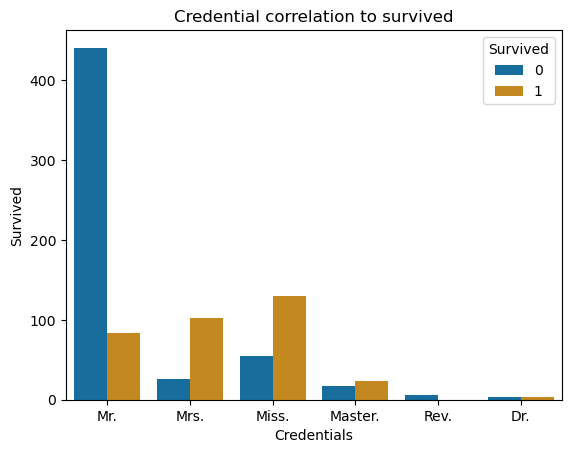

In [122]:

plot_correlation(df, 'Survived', 'Credential correlation to survived', 'Credentials', 'Survived', palette="colorblind")

In [124]:
df['NameLength'] = dfr['Name'].apply(len)
tst['NameLength'] = df_test['Name'].apply(len)


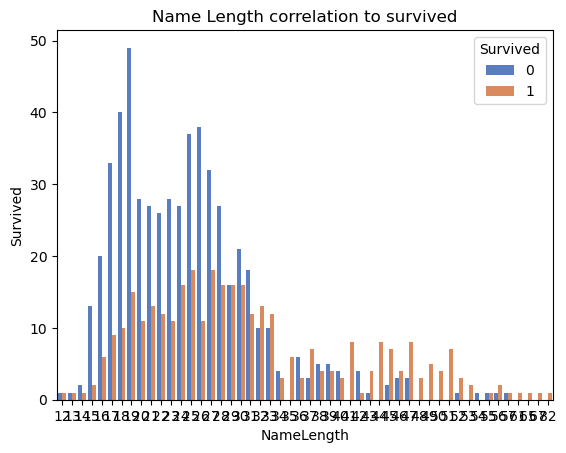

In [126]:
plot_correlation(df, 'Survived', 'Name Length correlation to survived', 'NameLength', 'Survived', palette='muted' )

In [128]:
# We see a nice correlation, I guess people with shot name survived most like mine :)

#Let's check if there is a correlation of concatenated credential and name length

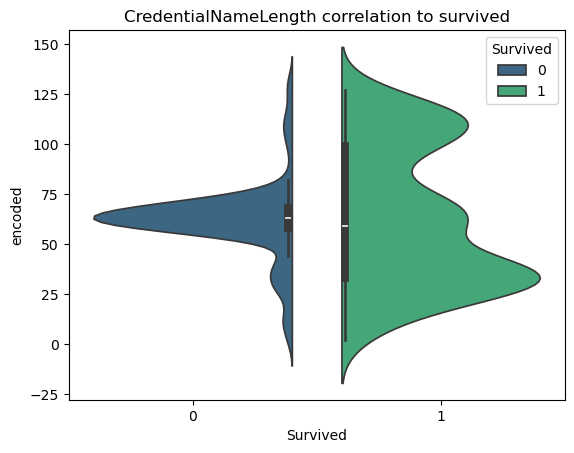

In [130]:
df['CredentialNameLength'] = df['Credentials'].astype(str) + df['NameLength'].astype(str)
tst['CredentialNameLength'] = tst['Credentials'].astype(str) + tst['NameLength'].astype(str)

df['encoded'] = le.fit_transform(df['CredentialNameLength'])

plot_violin(df, 'Survived', 'CredentialNameLength correlation to survived','Survived', 'encoded', palette='viridis')

In [133]:
# Values are not inheritly continuous this may be misleading, addinng them

df.drop('encoded', axis=1, inplace=True)

df['UniqueLetters'] =  dfr['Name'].apply(lambda x: len(set(x)))
tst['UniqueLetters'] =  df_test['Name'].apply(lambda x: len(set(x)))


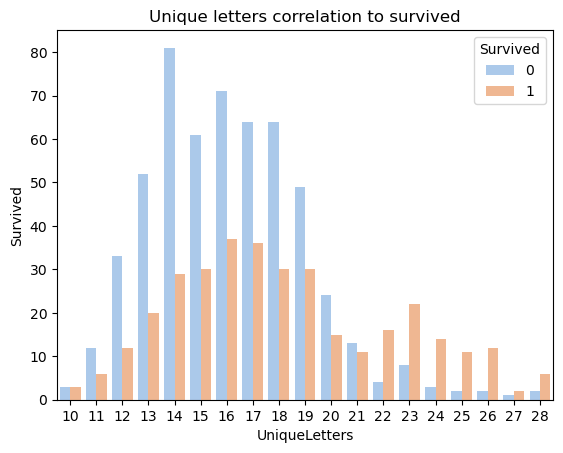

In [135]:
plot_correlation(df, 'Survived', 'Unique letters correlation to survived', 'UniqueLetters', 'Survived', palette='pastel')

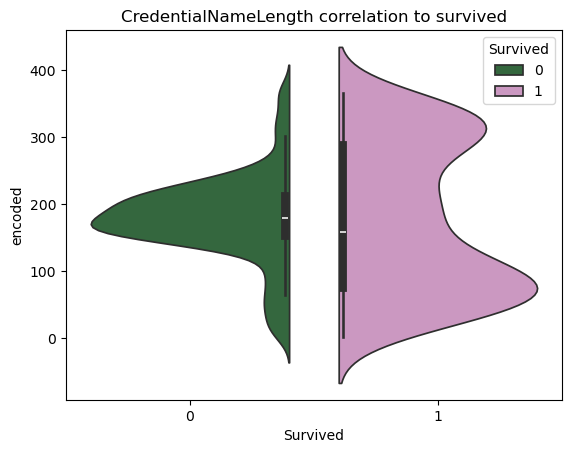

In [145]:
df['CredentialNameLengthUnique'] = df['CredentialNameLength'].astype(str) + df['UniqueLetters'].astype(str)
tst['CredentialNameLengthUnique'] = tst['CredentialNameLength'].astype(str) + tst['UniqueLetters'].astype(str)

df['encoded'] = le.fit_transform(df['CredentialNameLengthUnique'])

plot_violin(df, 'Survived', 'CredentialNameLength correlation to survived','Survived', 'encoded', palette='cubehelix')

df.drop('encoded', axis=1, inplace=True)

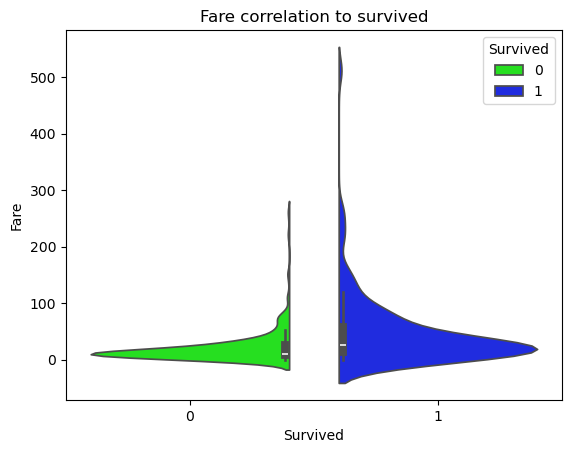

In [153]:
plot_violin(dfr, 'Survived', 'Fare correlation to survived','Survived', 'Fare', palette='hsv')

In [155]:
# We see a small correlation, we will add this, we will check this togther with tickets 
# because they are both info about ticket. We will handle the weird ticket values by takeing the first letter

dfr['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [157]:
df['Fare'] =  dfr['Fare']
tst['Fare'] =  df_test['Fare']

df['Ticket'] =  dfr['Ticket'].str[0] # This extracts the first character from each entry in the Ticket column
tst['Ticket'] =  df_test['Ticket'].str[0]

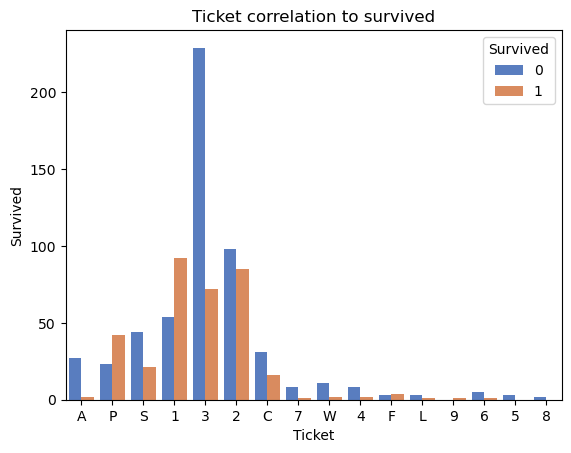

In [165]:
plot_correlation(df, 'Survived', 'Ticket correlation to survived', 'Ticket', 'Survived', palette='muted')

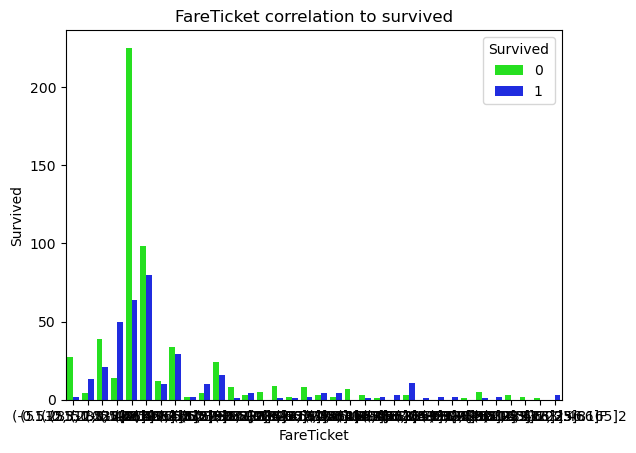

In [169]:
# We see a correlation, let's add it with the fare

df['FareTicket'] = pd.cut(df['Fare'], 10).astype(str) + df['Ticket'].astype(str)
tst['FareTicket'] = pd.cut(tst['Fare'], 10).astype(str) + tst['Ticket'].astype(str)

plot_correlation(df, 'Survived', 'FareTicket correlation to survived', 'FareTicket', 'Survived', palette='hsv')

df.drop(['Survived'], axis=1, inplace = True)

# Sanity check

Sanity checks are a fundamental part of any workflow or analysis to ensure everything is on the right track 
before diving into more detailed or complex tasks.

In [172]:
set(df.columns) == set(tst.columns)

True

In [174]:
nans = df.isna().sum().sort_values(ascending=False)
pct = 100 * nans / df.shape[0]
nan_stats = pd.concat([nans, pct], axis=1)
nan_stats.columns = ['num_of_missing_values', 'percentage_of_missing_values']
print("Missing values of training set:")
nan_stats

Missing values of training set:


,num_of_missing_values,percentage_of_missing_values
Age,177,19.865320
Embarked,2,0.224467
Pclass,0,0.000000
Sex,0,0.000000
PclassSex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
SibSpParch,0,0.000000
Credentials,0,0.000000
NameLength,0,0.000000


In [178]:
nans = tst.isna().sum().sort_values(ascending=False)
pct = 100 * nans / tst.shape[0]
nan_stats = pd.concat([nans, pct], axis=1)
nan_stats.columns = ['num_of_missing_values', 'percentage_of_missing_values']
print("Missing values of testing set:")
nan_stats

Missing values of testing set:


,num_of_missing_values,percentage_of_missing_values
Age,86,20.574163
Fare,1,0.239234
Pclass,0,0.000000
Sex,0,0.000000
PclassSex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Embarked,0,0.000000
SibSpParch,0,0.000000
Credentials,0,0.000000


# PREROCESSING

The goal is to make the data suitable for analysis, improve the quality of the data, and ensure that the resulting models are accurate and reliable.


In [182]:
print(df.columns[df.dtypes == 'object'])

Index(['Sex', 'PclassSex', 'Embarked', 'SibSpParch', 'Credentials',
       'CredentialNameLength', 'CredentialNameLengthUnique', 'Ticket',
       'FareTicket'],
      dtype='object')


In [184]:
df[df.columns[df.dtypes == 'object']] = df[df.columns[df.dtypes == 'object']].apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)
tst[tst.columns[tst.dtypes == 'object']] = tst[tst.columns[tst.dtypes == 'object']].apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

In [188]:
# IMPUTE FARE,AGE,EMBARKED- replace missing or incomplete data with estimated or substituted values. 

In [190]:
tst['Fare'].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [192]:
tst['Fare'] = tst['Fare'].fillna(12) # 12 as logical substitution

In [194]:
df['Embarked'].value_counts()

Embarked
2    644
0    168
1     77
3      2
Name: count, dtype: int64

In [196]:
df['Embarked'] = df['Embarked'].fillna(2) # 2 as logical substitution

In [198]:
# Normalizing X for neural networks - 
# Normalizing data for a neural network means scaling the input features so that they have similar ranges or distributions.

In [200]:
y = labels
fin = pd.concat([df, tst],axis=0)
columns = fin.columns

In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
finarr = scaler.fit_transform(fin)


In [204]:
findf = pd.DataFrame(finarr, columns=columns)

In [206]:
# Using a simple K-Nearest Neighbors (KNN) imputer for missing values
from sklearn.impute import KNNImputer 
imputer = KNNImputer(n_neighbors=20)
findf[['Age']] = imputer.fit_transform(findf[['Age']])

In [208]:
# Sanity Check

(findf.isna().sum() > 1).all()

False

In [210]:
x = findf.to_numpy() # Converts a DataFrame findf into a NumPy array x

x_train = x[:y.shape[0], :] # Slices the NumPy array x to obtain the train data (x_train).
x_test = x[y.shape[0]:, :] # Slices the NumPy array x to obtain the test data (x_test).

# TRAINING
We will try some decision tree models for tabular data with grid search.

In [213]:
from lightgbm import LGBMClassifier as lgbclf
# import xgboost as xgbclf
from sklearn.ensemble import RandomForestClassifier as rfclf
from sklearn.neural_network import MLPClassifier as mlpclf
from sklearn.model_selection import GridSearchCV, cross_val_score

In [215]:
param_grid_light = {
    'num_leaves' : [15, 31, 45],
    'max_depth' : [-1, 3, 4],
    'n_estimators': [50, 100, 150],
    'min_samples_leaf' : [5, 10, 15]
}
param_grid_rf = {
    'n_estimators': [50, 100, 250, 500],
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf' : [2, 3, 5],
    'max_features' : ['sqrt', 16]
}

In [223]:
lgb = lgbclf(verbosity=-1)
rf = rfclf()

lgbcv = GridSearchCV(estimator=lgb, param_grid=param_grid_light, cv=5, scoring='accuracy') 
# cross-validation splits the data into 5 parts to ensure robust evaluation

rfcv = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')

In [225]:
grid_search_models = [lgbcv, rfcv]

In [229]:
best_models = []

for i, clf in enumerate(grid_search_models, 1):
    clf.fit(x_train, y)
    print(f'Best Parameters (Grid  {i}): ', clf.best_params_)
    print(f'Best Model (Grid {i}): ', clf.best_estimator_)
    print(f'Best Cross-Validation Accuracy (Grid {i}): ', f'{clf.best_score_:.4f}')
    best_models.append(clf.best_estimator_)

Best Parameters (Grid  1):  {'max_depth': 4, 'min_samples_leaf': 10, 'n_estimators': 100, 'num_leaves': 15}
Best Model (Grid 1):  LGBMClassifier(max_depth=4, min_samples_leaf=10, num_leaves=15, verbosity=-1)
Best Cross-Validation Accuracy (Grid 1):  0.8361
Best Parameters (Grid  2):  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 50}
Best Model (Grid 2):  RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50)
Best Cross-Validation Accuracy (Grid 2):  0.8361


In [231]:
rf1 = rfclf(max_depth=6, max_features='sqrt', min_samples_leaf=2, n_estimators=100)

lgm1 = lgbclf(max_depth=3, min_samples_leaf=15, n_estimators=150, num_leaves=31)

rf1.fit(x_train, y)

RandomForestClassifier(max_depth=6, min_samples_leaf=2)

In [233]:
lgm1.fit(x_train, y)

LGBMClassifier(max_depth=3, min_samples_leaf=15, n_estimators=150)

# PREDICTIONS 

In [240]:
predictions = lgm1.predict(x_test)
output = pd.DataFrame({
    'PassengerId': df_test.PassengerId,
    'Survived': predictions.astype(int)
})
output.to_csv(f'survived_submodel_.csv', index=False)

In [242]:
for i, best_model in enumerate(best_models, 0):
    predictions = best_model.predict(x_test)

    output = pd.DataFrame({
        'PassengerId': df_test.PassengerId,
         'Survived': predictions.astype(int)
    })
    output.to_csv(f'survived_submodel{i}.csv', index=False)